In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [5]:
train_data.shape, test_data.shape

((1628, 29), (470, 28))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [7]:
train_data.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

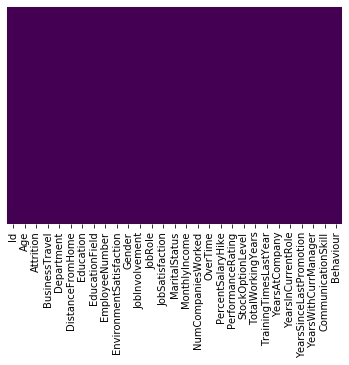

In [10]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

# Exploratory Data Analysis

0    0.517813
1    0.482187
Name: Attrition, dtype: float64

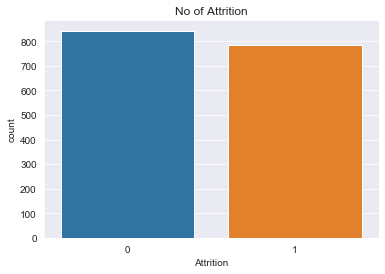

In [11]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', data = train_data)
plt.title('No of Attrition')
train_data['Attrition'].value_counts(normalize = True)

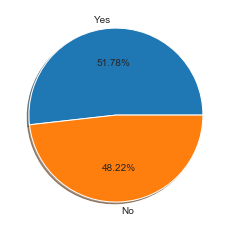

In [12]:
plt.pie(train_data['Attrition'].value_counts(), labels = ['Yes', 'No'], shadow = True, autopct = '%1.2f%%');

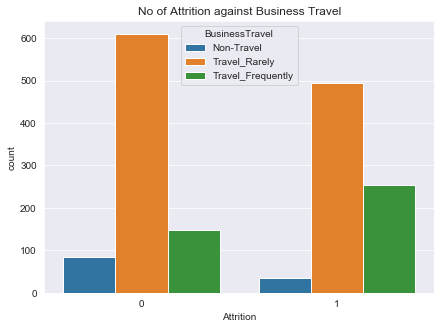

In [13]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'BusinessTravel', data = train_data)
plt.title('No of Attrition against Business Travel');

In [14]:
pd.DataFrame(train_data.groupby(['BusinessTravel', 'Attrition'])['Attrition'].count())

Attrition
BusinessTravel    Attrition           
Non-Travel        0                 85
                  1                 35
Travel_Frequently 0                148
                  1                255
Travel_Rarely     0                610
                  1                495

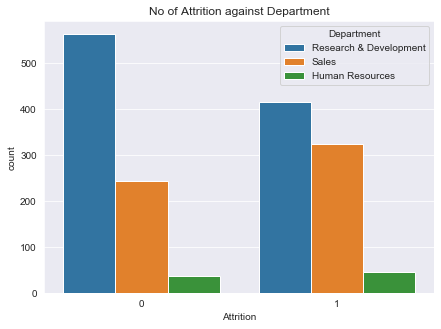

In [15]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'Department', data = train_data)
plt.title('No of Attrition against Department');

In [16]:
pd.DataFrame(train_data.groupby(['Department', 'Attrition'])['Attrition'].count())

Attrition
Department             Attrition           
Human Resources        0                 36
                       1                 45
Research & Development 0                564
                       1                415
Sales                  0                243
                       1                325

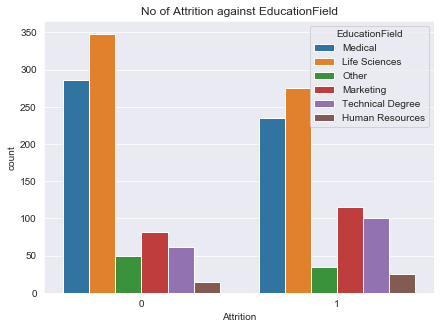

In [17]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'EducationField', data = train_data)
plt.title('No of Attrition against EducationField');

In [18]:
pd.DataFrame(train_data.groupby(['EducationField', 'Attrition'])['Attrition'].count())

Attrition
EducationField   Attrition           
Human Resources  0                 15
                 1                 25
Life Sciences    0                348
                 1                275
Marketing        0                 82
                 1                115
Medical          0                286
                 1                235
Other            0                 50
                 1                 35
Technical Degree 0                 62
                 1                100

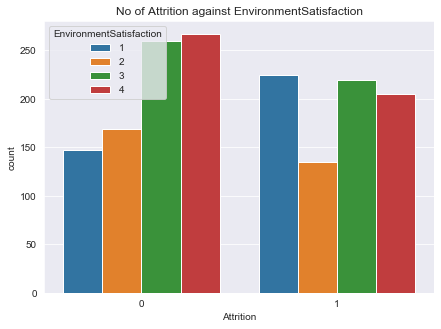

In [19]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'EnvironmentSatisfaction', data = train_data)
plt.title('No of Attrition against EnvironmentSatisfaction');

In [20]:
pd.DataFrame(train_data.groupby(['EnvironmentSatisfaction', 'Attrition'])['Attrition'].count())

Attrition
EnvironmentSatisfaction Attrition           
1                       0                147
                        1                225
2                       0                169
                        1                135
3                       0                260
                        1                220
4                       0                267
                        1                205

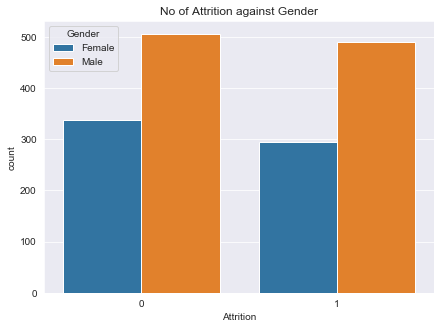

In [21]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'Gender', data = train_data)
plt.title('No of Attrition against Gender');

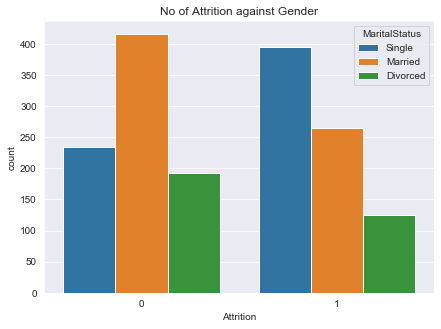

In [22]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'MaritalStatus', data = train_data)
plt.title('No of Attrition against Gender');

In [23]:
pd.DataFrame(train_data.groupby(['MaritalStatus', 'Attrition'])['Attrition'].count())

Attrition
MaritalStatus Attrition           
Divorced      0                192
              1                125
Married       0                416
              1                265
Single        0                235
              1                395

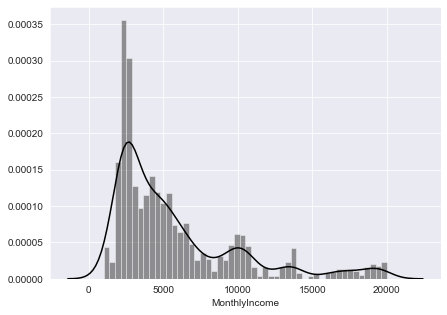

In [24]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['MonthlyIncome'], bins = 50, color = 'k');

In [25]:
train_data['MonthlyIncome'] = np.log1p(train_data['MonthlyIncome'])

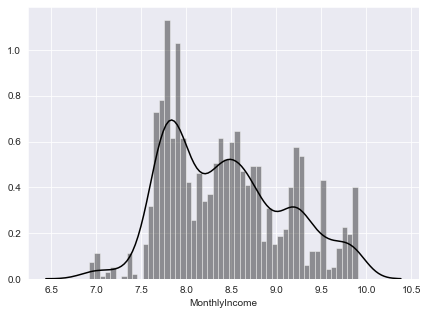

In [26]:
plt.figure(figsize =(7,5))
sns.distplot(train_data['MonthlyIncome'], bins = 50, color = 'k');

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [28]:
#bins1 = [18, 34, 60]

In [29]:
#group_names = ['young', 'old']
#train_data['Age'] = pd.cut(train_data['Age'], bins = bins1, labels = group_names)

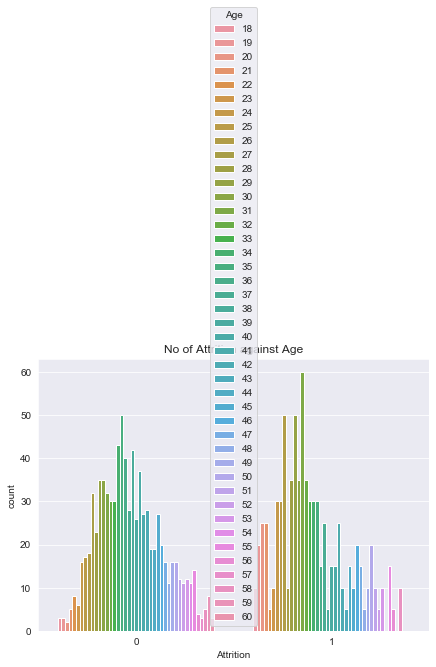

In [30]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'Age', data = train_data)
plt.title('No of Attrition against Age');

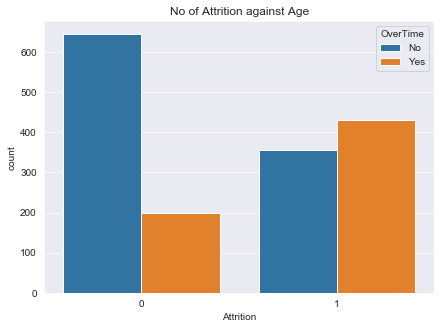

In [31]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'OverTime', data = train_data)
plt.title('No of Attrition against Age');

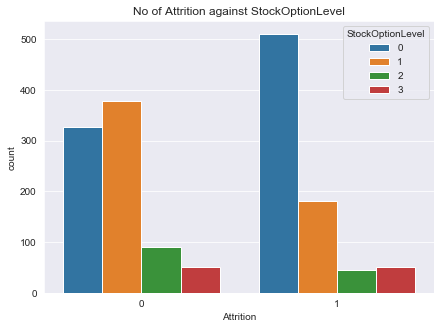

In [32]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'StockOptionLevel', data = train_data)
plt.title('No of Attrition against StockOptionLevel');

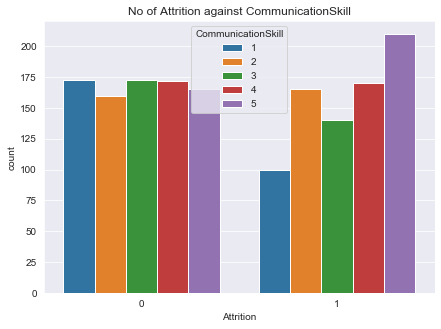

In [33]:
plt.figure(figsize =(7,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', hue = 'CommunicationSkill', data = train_data)
plt.title('No of Attrition against CommunicationSkill');

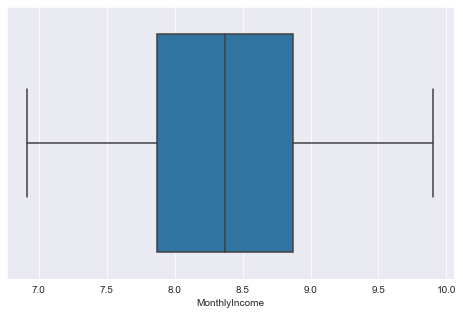

In [34]:
plt.figure(figsize =(8,5))
sns.boxplot(x = train_data['MonthlyIncome']);

In [35]:
train_data.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [36]:
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1628 non-null   int64  
 1   Age                      1628 non-null   int64  
 2   Attrition                1628 non-null   int64  
 3   BusinessTravel           1628 non-null   object 
 4   Department               1628 non-null   object 
 5   DistanceFromHome         1628 non-null   int64  
 6   Education                1628 non-null   int64  
 7   EducationField           1628 non-null   object 
 8   EmployeeNumber           1628 non-null   int64  
 9   EnvironmentSatisfaction  1628 non-null   int64  
 10  Gender                   1628 non-null   object 
 11  JobInvolvement           1628 non-null   int64  
 12  JobRole                  1628 non-null   object 
 13  JobSatisfaction          1628 non-null   int64  
 14  MaritalStatus           

In [38]:
train_data['MaritalStatus'].value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

In [39]:
train_data['Gender'] = train_data['Gender'].map({'Male':1,'Female':0})
train_data['MaritalStatus'] = train_data['MaritalStatus'].map({'Married':1,'Single':0, 'Divorced':2})
train_data['OverTime'] = train_data['OverTime'].map({'Yes':1,'No':0})

Dummies = pd.get_dummies(train_data[['BusinessTravel', 'Department', 'EducationField', 'JobRole']], drop_first = True)
train_data = train_data.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole'], axis = 1)
train_data = pd.concat([train_data, Dummies], axis = 1)

In [40]:
train_data.head()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,30,0,2,3,571,3,0,3,4,...,0,0,0,1,0,0,0,0,0,0
1,2,36,0,12,4,1614,3,0,3,3,...,0,0,0,0,0,1,0,0,0,0
2,3,55,1,2,1,842,3,1,3,4,...,0,0,0,0,0,0,0,0,1,0
3,4,39,0,24,1,2014,1,1,3,4,...,0,0,0,0,0,0,0,1,0,0
4,5,37,0,3,3,689,3,1,3,3,...,1,0,0,0,0,1,0,0,0,0


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 1628 non-null   int64  
 1   Age                                1628 non-null   int64  
 2   Attrition                          1628 non-null   int64  
 3   DistanceFromHome                   1628 non-null   int64  
 4   Education                          1628 non-null   int64  
 5   EmployeeNumber                     1628 non-null   int64  
 6   EnvironmentSatisfaction            1628 non-null   int64  
 7   Gender                             1628 non-null   int64  
 8   JobInvolvement                     1628 non-null   int64  
 9   JobSatisfaction                    1628 non-null   int64  
 10  MaritalStatus                      1628 non-null   int64  
 11  MonthlyIncome                      1628 non-null   float

In [42]:
train_data['EmployeeNumber'].value_counts()

1       5
514     5
1486    5
478     5
485     5
       ..
1297    1
1296    1
1294    1
1293    1
1001    1
Name: EmployeeNumber, Length: 1000, dtype: int64

In [43]:
Z = train_data.drop(['Id', 'Attrition'], axis = 1)
a = train_data['Attrition']
num_feats = 15

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

Z_norm = MinMaxScaler().fit_transform(Z)
chi_selector = SelectKBest(chi2, k = num_feats)
fit = chi_selector.fit(Z_norm, a)
chi_support = chi_selector.get_support()
chi_feature = Z.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected feature')

15 selected feature


In [45]:
chi_feature

['MaritalStatus',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'Department_Research & Development',
 'Department_Sales',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Sales Representative']

In [46]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Z.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['features_name','score']
featureScores.nlargest(40,'score')

,features_name,score
11,OverTime,103.165751
39,JobRole_Sales Representative,63.118434
36,JobRole_Research Director,43.766311
23,BusinessTravel_Travel_Frequently,36.591459
35,JobRole_Manufacturing Director,26.592961
34,JobRole_Manager,24.360276
18,YearsInCurrentRole,21.991998
8,MaritalStatus,21.592406
26,Department_Sales,18.425100
14,StockOptionLevel,18.045494


In [47]:
X = train_data.drop(['Id', 'Attrition'], axis = 1)
y = train_data['Attrition']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       240
           1       0.79      0.71      0.75       249

    accuracy                           0.76       489
   macro avg       0.76      0.76      0.76       489
weighted avg       0.76      0.76      0.76       489

[[194  46]
 [ 72 177]]
0.7586912065439673
0.7595883534136546


In [54]:
model_LR2 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']
param_grid = dict(penalty = penalty, C = C, solver = solver)

LR2 = GridSearchCV(estimator = model_LR2, param_grid = param_grid, scoring = 'accuracy', verbose = 1, n_jobs = -1)
LR2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 153 out of 160 | elapsed:   21.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   22.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [55]:
LR2.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred_LR = LR2.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR))
print(accuracy_score(y_pred_LR, y_test))
print(roc_auc_score(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       240
           1       0.79      0.71      0.75       249

    accuracy                           0.76       489
   macro avg       0.76      0.76      0.76       489
weighted avg       0.76      0.76      0.76       489

[[194  46]
 [ 72 177]]
0.7586912065439673
0.7595883534136546


In [57]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [58]:
y_pred_DTR = DTR.predict(X_test)
print(classification_report(y_test, y_pred_DTR))
print(confusion_matrix(y_test, y_pred_DTR))
print(accuracy_score(y_pred_DTR, y_test))
print(roc_auc_score(y_test, y_pred_DTR))
print(roc_curve(y_pred_DTR, y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       240
           1       0.86      0.85      0.85       249

    accuracy                           0.85       489
   macro avg       0.85      0.85      0.85       489
weighted avg       0.85      0.85      0.85       489

[[205  35]
 [ 37 212]]
0.852760736196319
0.8527861445783131
(array([0.        , 0.15289256, 1.        ]), array([0.       , 0.8582996, 1.       ]), array([2, 1, 0], dtype=int64))


In [59]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred_SVR = SVR.predict(X_test)
#print(classification_report(y_test, y_pred_SVR))
#print(confusion_matrix(y_test, y_pred_SVR))
#print(accuracy_score(y_pred_SVR, y_test))
print(roc_auc_score(y_test, y_pred_SVR))
#print(roc_curve(y_pred_SVR, y_test))

0.9797021419009371


In [61]:
from sklearn.svm import SVC
model_SVC2 = SVC(probability =  True)
C = [0.01, 0.1, 1]
kernel = ['linear', 'poly', 'rbf']
param_grid = dict(C = C, kernel = kernel)

SVC2 = GridSearchCV(estimator = model_SVC2, param_grid = param_grid, scoring = 'accuracy', verbose = 1, n_jobs = -1)
SVC2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [62]:
SVC2.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
y_pred_SVC2 = SVC2.predict(X_test)
print(classification_report(y_test, y_pred_SVC2))
print(confusion_matrix(y_test, y_pred_SVC2))
print(accuracy_score(y_pred_SVC2, y_test))
print(roc_auc_score(y_test, y_pred_SVC2))
print(roc_curve(y_pred_SVC2, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.94      0.90      0.92       249

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489

[[225  15]
 [ 24 225]]
0.9202453987730062
0.9205572289156627
(array([0.        , 0.09638554, 1.        ]), array([0.    , 0.9375, 1.    ]), array([2, 1, 0], dtype=int64))


In [64]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
y_pred_RFR = RFR.predict(X_test)
#print(classification_report(y_test, y_pred_RFR))
#print(confusion_matrix(y_test, y_pred_RFR))
#print(accuracy_score(y_pred_RFR, y_test))
print(roc_auc_score(y_test, y_pred_RFR))

0.9886546184738956


In [66]:
model_rfr = RandomForestRegressor()

tuned_parameters = {'min_samples_leaf': range(2,100,10), 
                    'n_estimators' : range(100,550,50),
                    'max_features':['auto','sqrt','log2'],
                    'max_depth' : range(0,100,10)
                    }

rfr2 = RandomizedSearchCV(estimator = model_rfr, param_distributions = tuned_parameters, scoring = 'roc_auc', verbose = 1, n_jobs = -1, random_state = 1)
rfr2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [67]:
y_pred_RFR2 = rfr2.predict(X_test)
print(roc_auc_score(y_test, y_pred_RFR2))

0.9930220883534137


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [69]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(accuracy_score(y_pred_rfc, y_test))
print(roc_auc_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       240
           1       0.96      0.96      0.96       249

    accuracy                           0.96       489
   macro avg       0.96      0.96      0.96       489
weighted avg       0.96      0.96      0.96       489

[[229  11]
 [ 10 239]]
0.9570552147239264
0.9570030120481928


In [70]:
model_rfc2 = RandomForestClassifier(random_state = 1)

tuned_parameters = {'min_samples_leaf': range(2,100,10), 
                    'n_estimators' : range(100,550,50),
                    'max_features':['auto','sqrt','log2'],
                    'max_depth' : range(0,100,10)
                    }

rfc2 = RandomizedSearchCV(estimator = model_rfc2, param_distributions = tuned_parameters, scoring = 'accuracy', verbose = 1, n_jobs = -1, random_state = 1)
rfc2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   42.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [1]:
rfc2.best_estimator_

NameError: name 'rfc2' is not defined

In [71]:
y_pred_rfc2 = rfc2.predict(X_test)
print(classification_report(y_test, y_pred_rfc2))
print(confusion_matrix(y_test, y_pred_rfc2))
print(accuracy_score(y_pred_rfc2, y_test))
print(roc_auc_score(y_test, y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       240
           1       0.95      0.98      0.96       249

    accuracy                           0.96       489
   macro avg       0.96      0.96      0.96       489
weighted avg       0.96      0.96      0.96       489

[[227  13]
 [  5 244]]
0.9631901840490797
0.9628765060240962


In [72]:
rfc.feature_importances_

array([0.07187912, 0.0484133 , 0.02167764, 0.05753161, 0.0299236 ,
       0.00953072, 0.02402442, 0.03368911, 0.03422597, 0.07906497,
       0.02967276, 0.05846306, 0.03853896, 0.00567702, 0.05092666,
       0.05796452, 0.02896699, 0.0481648 , 0.04085068, 0.02561285,
       0.03376641, 0.0334362 , 0.        , 0.01393221, 0.00685767,
       0.01151105, 0.01446561, 0.0093958 , 0.00531029, 0.00953686,
       0.0031035 , 0.00704518, 0.0024613 , 0.00949051, 0.00389826,
       0.00589044, 0.00392732, 0.0098121 , 0.01107679, 0.01028376])

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [74]:
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(accuracy_score(y_pred_dtc, y_test))
print(roc_auc_score(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       240
           1       0.86      0.85      0.85       249

    accuracy                           0.85       489
   macro avg       0.85      0.85      0.85       489
weighted avg       0.85      0.85      0.85       489

[[205  35]
 [ 37 212]]
0.852760736196319
0.8527861445783131


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = 0)
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [76]:
y_pred_etc = etc.predict(X_test)
print(classification_report(y_test, y_pred_etc))
print(confusion_matrix(y_test, y_pred_etc))
print(accuracy_score(y_pred_etc, y_test))
print(roc_auc_score(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       240
           1       0.98      0.96      0.97       249

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

[[236   4]
 [ 10 239]]
0.9713701431492843
0.971586345381526


In [77]:
#model_etc = ExtraTreesClassifier(random_state = 0)

#tuned_parameters = {'min_samples_leaf': [2,3,4],
                    'n_estimators' : [300,350,400,450,500],
                    'max_features':['auto','sqrt','log2'],
                    'max_depth' : [20,30,40],
                    }

#etc2 = GridSearchCV(estimator = model_etc, param_grid = tuned_parameters, scoring = 'accuracy', verbose = 1, n_jobs = -1)
#etc2.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed: 12.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=0,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [98]:
#etc2.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=20, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=450,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [99]:
#y_pred_etc2 = etc2.predict(X_test)
#print(classification_report(y_test, y_pred_etc2))
#print(confusion_matrix(y_test, y_pred_etc2))
#print(accuracy_score(y_pred_etc2, y_test))
#print(roc_auc_score(y_test, y_pred_etc2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       240
           1       0.97      0.98      0.97       249

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

[[232   8]
 [  5 244]]
0.9734151329243353
0.9732931726907631


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [110]:
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(accuracy_score(y_pred_gbc, y_test))
print(roc_auc_score(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       240
           1       0.87      0.88      0.87       249

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489

[[207  33]
 [ 30 219]]
0.8711656441717791
0.8710090361445783


In [111]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 0)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [112]:
y_pred_abc = abc.predict(X_test)
print(classification_report(y_test, y_pred_abc))
print(confusion_matrix(y_test, y_pred_abc))
print(accuracy_score(y_pred_abc, y_test))
print(roc_auc_score(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       240
           1       0.80      0.77      0.78       249

    accuracy                           0.79       489
   macro avg       0.79      0.79      0.79       489
weighted avg       0.79      0.79      0.79       489

[[193  47]
 [ 58 191]]
0.7852760736196319
0.7856174698795182


In [113]:
import xgboost as xgb

In [114]:
params = {
    'learning_rate'   : [0.05,0.3,0.10,0.15,0.20],
    'max_depth'       : [3,4,5,6,8,10],
    'gamma'           : [0.0,0.1,0.2,0.3,0.4],
    'n_estimators'    : range(100,1000,100),
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}


model_xgb = xgb.XGBClassifier()

xgb1 = RandomizedSearchCV(estimator=model_xgb,
                             param_distributions=params,n_iter=5,
                            scoring='accuracy',cv=5,n_jobs=-1)

xgb1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [115]:
y_pred_xgb = xgb1.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       240
           1       0.94      0.96      0.95       249

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489

[[224  16]
 [ 10 239]]
0.7586912065439673


In [80]:
#model_dtc = DecisionTreeClassifier(random_state = 0)

#tuned_parameters_dtc = {'criterion':['gini', 'entropy'], 'max_depth':range(0,100,10), 'max_features': ['auto', 'sqrt', 'log2'],
 #                       'min_samples_leaf': range(1,20,2), 'min_samples_split': range(1,40,4)}

#dtc2 = GridSearchCV(estimator = model_dtc, param_grid = tuned_parameters_dtc, scoring = 'accuracy', verbose = 1, n_jobs = -1)
#dtc2.fit(X_train, y_train)

In [81]:
#y_pred_dtc2 = dtc2.predict(X_test)
#print(classification_report(y_test, y_pred_dtc2))
#print(confusion_matrix(y_test, y_pred_dtc2))
#print(accuracy_score(y_pred_dtc2, y_test))
#print(roc_auc_score(y_test, y_pred_dtc2))

In [82]:
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       470 non-null    int64 
 1   Age                      470 non-null    int64 
 2   BusinessTravel           470 non-null    object
 3   Department               470 non-null    object
 4   DistanceFromHome         470 non-null    int64 
 5   Education                470 non-null    int64 
 6   EducationField           470 non-null    object
 7   EmployeeNumber           470 non-null    int64 
 8   EnvironmentSatisfaction  470 non-null    int64 
 9   Gender                   470 non-null    object
 10  JobInvolvement           470 non-null    int64 
 11  JobRole                  470 non-null    object
 12  JobSatisfaction          470 non-null    int64 
 13  MaritalStatus            470 non-null    object
 14  MonthlyIncome            470 non-null    i

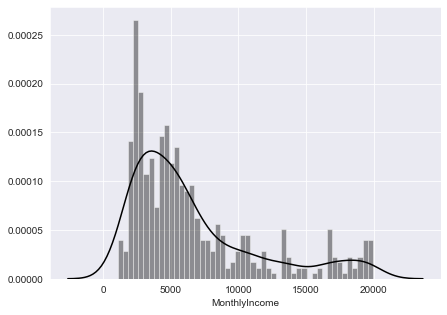

In [84]:
plt.figure(figsize =(7,5))
sns.distplot(test_data['MonthlyIncome'], bins = 50, color = 'k');
#train_data['MonthlyIncome'] = np.log1p(train_data['MonthlyIncome'])

In [85]:
test_data['Gender'] = test_data['Gender'].map({'Male':1,'Female':0})
test_data['MaritalStatus'] = test_data['MaritalStatus'].map({'Married':1,'Single':0, 'Divorced':2})
test_data['OverTime'] = test_data['OverTime'].map({'Yes':1,'No':0})

Dummies = pd.get_dummies(test_data[['BusinessTravel', 'Department', 'EducationField', 'JobRole']], drop_first = True)
test_data = test_data.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole'], axis = 1)
test_data = pd.concat([test_data, Dummies], axis = 1)

In [86]:
train_data['MonthlyIncome'] = np.log1p(train_data['MonthlyIncome'])

In [87]:
ID = test_data['Id']
test = test_data.drop(['Id'], axis = 1)

In [88]:
sc_test = StandardScaler()
test = sc_test.fit_transform(test)

In [100]:
output = etc2.predict_proba(test)

In [101]:
type(output)

numpy.ndarray

In [102]:
output = pd.DataFrame(output)
output.columns = ['proba1', 'Attrition']

In [103]:
Attrition = output.drop('proba1', axis = 1)

In [104]:
Attrition

,Attrition
0,0.151831
1,0.153623
2,0.266433
3,0.237702
4,0.160882
...,...
465,0.455035
466,0.897823
467,0.436354
468,0.166871


In [105]:
ID = pd.DataFrame(ID)
ID.columns = ['Id']

In [106]:
final_predictions = pd.concat([ID, Attrition], axis = 1)

In [107]:
final_predictions.head()

,Id,Attrition
0,1,0.151831
1,2,0.153623
2,3,0.266433
3,4,0.237702
4,5,0.160882


In [108]:
final_predictions.to_csv('submission_7.csv')